<a href="https://colab.research.google.com/github/DINH20104022/2014022-Hung-Minh-Tran-Dinh/blob/main/nhan.dien.khuonmat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import validation 
from sklearn import preprocessing
from keras.utils import to_categorical
from keras.models import load_model
from keras.utils import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator

In [2]:
%cd /content/drive/MyDrive/DOWLOAD/khuôn mat

/content/drive/MyDrive/DOWLOAD/khuôn mat


In [3]:
train_datagen=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
training_set=train_datagen.flow_from_directory('/content/drive/MyDrive/DOWLOAD/khuôn mat',target_size=(150,150), batch_size=32, class_mode='categorical')
test_set = train_datagen.flow_from_directory('/content/drive/MyDrive/DOWLOAD/khuôn mat',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 104 images belonging to 3 classes.
Found 104 images belonging to 3 classes.


In [4]:
training_set.class_indices
test_set.class_indices

{'Dương Duy Thoại-20221107T085128Z-001': 0,
 'Hùng Minh Trần Định-20104022': 1,
 'Lại Trí Minh-20221107T085227Z-001': 2}

In [5]:
model=Sequential()

model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(3,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                    

In [6]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(training_set,epochs=100,batch_size=128,verbose=1, validation_data=test_set, callbacks=[EarlyStopping(monitor='val_loss', patience=20)])

4/4 [==============================] - 26s 8s/step - loss: 4.5794e-06 - accuracy: 1.0000 - val_loss: 1.4774e-06 - val_accuracy: 1.0000
Epoch 93/100
4/4 [==============================] - 26s 7s/step - loss: 3.2793e-04 - accuracy: 1.0000 - val_loss: 6.6482e-08 - val_accuracy: 1.0000
Epoch 94/100
4/4 [==============================] - 26s 8s/step - loss: 5.0434e-07 - accuracy: 1.0000 - val_loss: 4.8486e-07 - val_accuracy: 1.0000
Epoch 95/100
4/4 [==============================] - 26s 7s/step - loss: 1.8293e-06 - accuracy: 1.0000 - val_loss: 6.0406e-07 - val_accuracy: 1.0000
Epoch 96/100
4/4 [==============================] - 26s 7s/step - loss: 8.1230e-06 - accuracy: 1.0000 - val_loss: 9.5136e-07 - val_accuracy: 1.0000
Epoch 97/100
4/4 [==============================] - 26s 8s/step - loss: 7.6917e-05 - accuracy: 1.0000 - val_loss: 1.9691e-06 - val_accuracy: 1.0000
Epoch 98/100
4/4 [==============================] - 26s 7s/step - loss: 1.0476e-06 - accuracy: 1.0000 - val_loss: 8.9290e-07 

In [7]:
model.save('khuon mat.h5')

In [8]:
model_gao = load_model('khuon mat.h5')

In [9]:
Score=model.evaluate(training_set,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 2.005919412795265e-07
Train Accuracy 1.0


1/1 [==============================] - 0s 83ms/step
Đây là : Lai Trí Minh


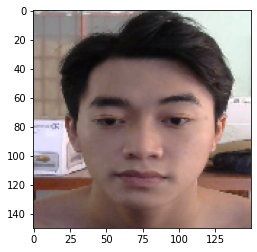

In [10]:
img = load_img('/content/Minh.PNG',target_size = (150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_gao.predict(img)
class_nhandien=['Hùng Minh Trần Định',
           'Dương Duy Thoai',
           'Lai Trí Minh']
a= int(np.argmax(model.predict(img),axis=1))
print("Đây là :", class_nhandien[a])

1/1 [==============================] - 0s 16ms/step
Đây là : Dương Duy Thoại


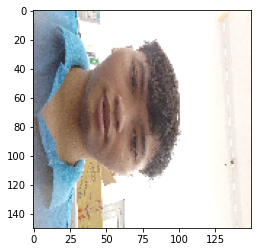

In [12]:
img = load_img('/content/Thoai.jpg',target_size = (150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_gao.predict(img)
class_nhandien=['Dương Duy Thoại',
           'Hùng Minh Trần Địnhi',
           'Lai Trí Minh']
a= int(np.argmax(model.predict(img),axis=1))
print("Đây là :", class_nhandien[a])

1/1 [==============================] - 0s 14ms/step
Đây là : Hùng Minh Trần Định


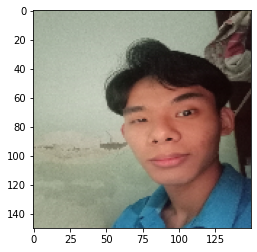

In [14]:
img = load_img('/content/Định.jpg',target_size = (150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_gao.predict(img)
class_nhandien=['Dương Duy Thoại',
           'Hùng Minh Trần Định',
           'Lai Trí Minh']
a= int(np.argmax(model.predict(img),axis=1))
print("Đây là :", class_nhandien[a])